In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

In [9]:
# data processing

# read h5 file and transform to ndarray
train = h5py.File('datasets/train_catvnoncat.h5', "r")
train_x = np.array(train["train_set_x"])/255
train_y = np.array(train["train_set_y"])

test = h5py.File('datasets/test_catvnoncat.h5', "r")
test_x = np.array(test["test_set_x"])/255
test_y = np.array(test["test_set_y"])

# classes
classes = np.array(test["list_classes"])

# reshape data
train_x = train_x.reshape(train_x.shape[0], -1).T
train_y = train_y.reshape(1, train_y.shape[0])

test_x = test_x.reshape(test_x.shape[0], -1).T
test_y = test_y.reshape(1, test_y.shape[0])

In [41]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [45]:
class model:
    def __init__(self, X, Y, nh, alpha=0.005, num_iterations=1000):
        self.w1 = 0.001 * np.random.random((X.shape[0], nh))
        self.w2 = 0.001 * np.random.random((nh, 1))
        self.b1 = np.zeros((nh, 1))
        self.b2 = 0.
        m = X.shape[1]
        self.costs = []
        for i in range(num_iterations):
            A1 = np.tanh(self.w1.T @ X + self.b1)
            A2 = sigmoid(self.w2.T @ A1 + self.b2)
            self.costs.append(1/m*np.sum(-Y*np.log(A2)-(1-Y)*np.log(1-A2)))
            # output layer gradient descent
            dA2 = A2 - Y
            dw2 = 1 / m * (A1 @ dA2.T)
            db2 = 1 / m * np.sum(dA2)
            # hidden layter gradient descent
            dA1 = 1-A1**2
            dw1 = 1 / m * (X @ dA1.T)
            db1 = 1 / m * np.sum(dA1)
            # update parameters
            self.w1 -= alpha*dw1
            self.w2 -= alpha*dw2
            self.b1 -= alpha*db1
            self.b2 -= alpha*db2

In [48]:
clf = model(train_x, train_y, nh=10)

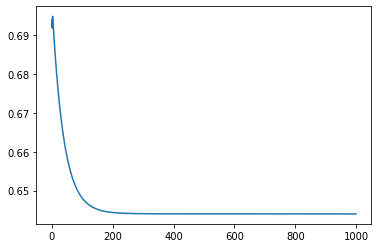

In [49]:
plt.plot(clf.costs)